<a href="https://colab.research.google.com/github/DidiRamsaran/AI_ML_projects/blob/main/ANN_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1. Feedforward Neural Networks for Non-linear Regression.

###Team Members:
1. D. Ramsaran-Chin
2. Victor Manuel Pietrini Fermín
3. Luis Fernando Díaz
4. Kevin Fernandez

###Instrucciones

1. Implemente una red neuronal feedforward, para predecir el siguiente valor, dados dos valores anteriores, de una serie generada por la función de recurrencia: $$x_{n+1} = 1 - a x_{n}^2 + y_n$$ $$y_{n+1} = bx_n$$ con $a=1.4$ y $b=0.3$ y a partir de la condición inicial $(x_0,y_0)$ que usted escoja. Note que la ecuacion recurrente anterior puede ser escrita como: $$x_{n+1} = 1 - a x_{n}^2 + bx_{n-1}$$ En este caso la condición inicial sería: $(x_0, x_1)$

2. Seleccione N valores de los pares ${(x_n, y_n), x_n+1}$ generados con la función anterior. Dividalos en dos conjuntos: uno de entrenamiento y otro de prueba.
3. Implemente una red neuronal _feedforward_ con dos neuronas en la capa de entrada, dos neuronas en la capa escondida y una neurona en la capa de salida.
4. Calcule el gradiente de la función de costo respecto a los parámetros de la red. La función de costo en este caso debe ser el error cuadrático medio. Incluya ese cálculo en su reporte.
5. Implemente el esquema de retropropagación a partir del gradiente anterior, para optimizar los parámetros de la red, usando el conjunto de entrenamiento.
6. Con el conjunto de prueba, valide el entrenamiento y mida la calidad del desempeño de su red.
7. Muestre los resultados con una gráfica de las etiquetas de prueba y las predicciones realizadas sobre esa misma data.
8. Implemente una red similar a la anterior usando Keras y compare los resultados.
9. Elabore el reporte del proyecto, usando un notebook de Jupyter a partir de la plantilla que encontrara en M7. El reporte debe ser presentado durante la clase y luego enviado por correo a la dirección: pgarcial@ucab.edu.ve usando como encabezado del correo y nombre del archivo: "IAAA_P1_Apellidos.ipynb."

In [ ]:
import numpy as np                                        # NumPy es una librería de Python especializada en el cálculo numérico y el análisis de datos.
import pandas as pd                                       # Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
import seaborn as sns                                     # Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib.
import matplotlib.pyplot as plt                           # Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python
import random


from sklearn import datasets                              # Herramientas simples y eficientes para el análisis predictivo de datos.
from sklearn.metrics import mean_squared_error            # Facilitar el cálculo del Error Cuadrático Medio
from sklearn.model_selection import train_test_split      # Facilitar el split de datos para cuando se usa sklearn
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression         # Modelo de regresiones lineales de sklearn
from sklearn.linear_model import Perceptron               # Perceptron de skitlearn


pd.set_option('display.max_columns', None)                # Establece el valor de la opción especificada.

%matplotlib inline

En primer lugar, se define una función llamada "generadorDatos" que se encarga de aplicar la función de recurrencia antes mencionada en el enunciado del proyecto.

Toma como variables de entrada el valor inicial de $x$, el valor inicial de $y$; por último toma la variable "N", que indica enúmero de filas de datos a generar.

Finalmente, devuelve los valores correspondientes a los **x**, **y**, **target** de cada fila.

In [ ]:
def generadorDatos(x0, y0, N):
  a = 1.4
  b = 0.3
  discartableRows = N*10

  # Se asignan los xn y yn para el valor n=0
  xn = x0
  yn = y0

  vector_x = []
  vector_y = []
  vector_target = []

  for n in range(discartableRows):
    xn1 = 1-a*xn*xn+yn # también se puede escribir 1-a*(xn**2)+yn
    yn1 = b*xn
    if (n >= discartableRows - N):
      vector_x.append(xn)
      vector_y.append(yn)
      vector_target.append(xn1)
    xn = xn1
    yn = yn1

  vector_x = np.array(vector_x)
  vector_y = np.array(vector_y)
  vector_target = np.array(vector_target)

  return(vector_x,vector_y,vector_target)

Una vez definida la función, se elijen los valores iniciales para x,y, así como también el número de filas deseadas

In [ ]:
# De momento se obtienen buenos valores con estos valores iniciales para N igual a 1000
x0 = 0.3
y0 = 0.3
N = 1000

vectores = generadorDatos(x0,y0,N)
vector_x, vector_y, vector_target = vectores

# Se corrobora el tipo de objeto de los vectores
print(type(vector_x))

data = {"vector_x": vector_x, "vector_y": vector_y, "vector_target": vector_target}

df = pd.DataFrame(data)

print(df)


<class 'numpy.ndarray'>
     vector_x  vector_y  vector_target
0    0.879373 -0.169600      -0.252215
1   -0.252215  0.263812       1.174755
2    1.174755 -0.075664      -1.007732
3   -1.007732  0.352426      -0.069308
4   -0.069308 -0.302320       0.690955
..        ...       ...            ...
995 -0.451456 -0.341974       0.372689
996  0.372689 -0.135437       0.670108
997  0.670108  0.111807       0.483145
998  0.483145  0.201032       0.874232
999  0.874232  0.144943       0.074950

[1000 rows x 3 columns]


De manera gráfica, se muestran los pares de x contra y del mapa de Henon

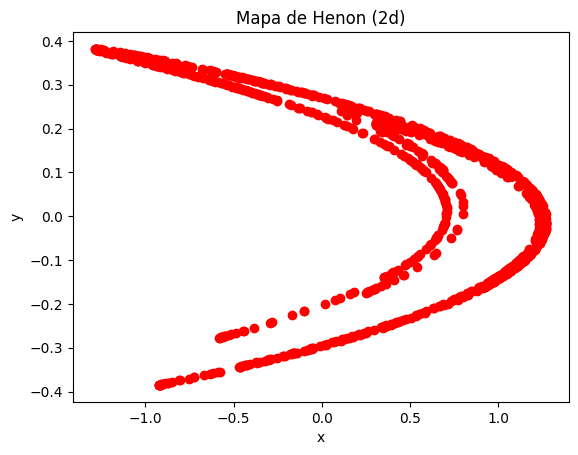

In [ ]:
# Mapa en 2d, solo con pares x y y
plt.scatter(vector_x, vector_y, color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa de Henon (2d)')
plt.show()

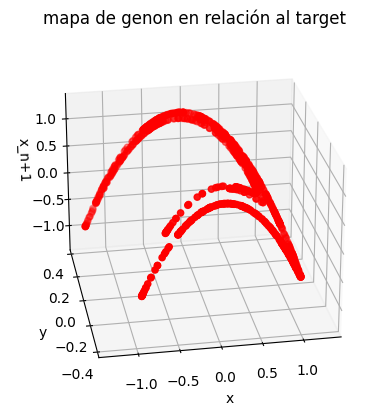

In [ ]:
# Mapa en 3d, con el label x_n+1

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(vector_x, vector_y, vector_target, color="red")

# títulos
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('x_n+1')
ax.set_title('mapa de genon en relación al target')

# Rotación
ax.view_init(elev=25, azim=-100)

plt.show()

Una vez hecho lo anterior, se procede con la división de los datos en datos de entrenamiento y datos de prueba. Para este caso, los datos de prueba representan el 25% del total de los datos.

Acto seguido, se define la función sigmoide, que es la función de activación:

In [ ]:
# Se hace la division entre los datos de entrenamiento y los datos de prueba
x_train, x_test, y_train, y_test, target_train, target_test = train_test_split(vector_x, vector_y, vector_target, test_size = 0.25, shuffle = True)


# Definimos la funcion de activacion. La funcion sigmoide
def sigmoid(x):
  s = 1 / (1 + np.exp(-x))
  return s

Seguidamente, se define la función para la red neuronal con dos neuronas en la capa de entrada (las cuales hacen multiplexing), dos en la capa escondida y una en la de salida.

Es especialmente importante destacar que el proceso de backpropagation requiere conocer las derivadas de los 9 parámetros a actualizar (3 sesgos y 6 pesos). Así, para la neurona de salida, las derivadas son:


$$
\frac{\partial
E}{\partial w_{31}}=
\frac{\partial E}{\partial \hat{y}}
*
\frac{\partial \hat y}{\partial z_{3}}
*
\frac {\partial z_{3}}{\partial w_{31}}
$$

$$
\frac{\partial
E}{\partial w_{32}}=
\frac{\partial E}{\partial \hat{y}}
*
\frac{\partial \hat y}{\partial z_{3}}
*
\frac {\partial z_{3}}{\partial w_{32}}
$$

$$
\frac{\partial E}{\partial b_3} = \frac{\partial E}{\partial \hat{y}}
*
\frac{\partial \hat y}{\partial z_{3}}
*
\frac {\partial z_{3}}{\partial b_{3}}
$$

Donde:

$$
\frac {\partial E}{\partial \hat y} = -(y - \hat y)
$$

$$
\frac {\partial \hat y}{\partial z_{3}} = \hat y(1 - \hat y)
$$

$$
\frac {\partial z_{3}}{\partial w_{31}} = a_{1}
$$

$$
\frac {\partial z_{3}}{\partial w_{32}} = a_{2}
$$

$$
\frac {\partial z_{3}}{\partial b_{3}} = 1
$$

Entonces:

$$
\frac{\partial E}{\partial w_{31}} = -(y- \hat y)*\hat y(1-\hat y)a_1
$$

$$
\frac{\partial E}{\partial w_{32}} = -(y- \hat y)*\hat y(1-\hat y)a_2
$$

$$
\frac {\partial z_{3}}{\partial b_{3}} = -(y- \hat y)*\hat y(1-\hat y)
$$



Seguidamente, se procede a detallar las derivadas que facilitan la actualización de los pesos y sesgos correspondientes al perceptrón 1. Este perceptrón es la primera neurona de la capa escondida.

$$
\frac {\partial E}{∂w_{11}} =
\frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_1} * \frac {∂a_1}{∂z_1} * \frac {∂z_1}{∂ w_{11}}
$$

$$
\frac {∂E}{∂w_{12}} = \frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_1} * \frac {∂a_1}{∂z_1} * \frac {∂z_1}{∂ w_{12}}
$$

$$
\frac {∂E}{∂b_{1}} = \frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_1} * \frac {∂a_1}{∂z_1} * \frac {∂z_1}{∂ b_{1}}
$$

Donde:

$$
\frac {∂z_3}{∂a_1} = w_{31}
$$

$$
\frac {∂a_1}{∂z_1} = a_1*(1-a_1)
$$

$$
\frac {∂z_1}{∂ w_{11}} = x_{1}
$$

$$
\frac {∂z_1}{∂ w_{12}} = x_{2}
$$

$$
\frac {∂z_1}{∂ b_{1}} = 1
$$

Entonces:

$$
\frac {\partial E}{∂w_{11}} = -(y - \hat y) * \hat y (1- \hat y)*w_{31}*a_1(1-a_1) * x_1
$$

$$
\frac {∂E}{∂w_{12}} = -(y - \hat y) * \hat y (1- \hat y)*w_{31}*a_1(1-a_1) * x_2
$$

$$
\frac {∂E}{∂b_{1}} = -(y - \hat y) * \hat y (1- \hat y)*w_{31}*a_1(1-a_1) * 1
$$

Por último, se detallan las derivadas utilizadas para actualizar los pesos y sesgos que corresponden al perceptrón 2. Este perceptrón es la segunda neurona de la capa escondida.

$$
\frac {\partial E}{∂w_{21}} =
\frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_2} * \frac {∂a_2}{∂z_2} * \frac {∂z_2}{∂ w_{21}}
$$

$$
\frac {\partial E}{∂w_{22}} =
\frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_2} * \frac {∂a_2}{∂z_2} * \frac {∂z_2}{∂ w_{22}}
$$

$$
\frac {\partial E}{∂b_{2}} =
\frac {∂E}{∂ \hat y} * \frac {∂ \hat y}{∂ z_3} * \frac {∂ z_3}{∂ a_2} * \frac {∂a_2}{∂z_2} * \frac {∂z_2}{∂ b_{2}}
$$

Donde:

$$
\frac {∂z_3}{∂a_2} = w_{32}
$$

$$
\frac {∂a_2}{∂z_2} = a_2*(1-a_2)
$$

$$
\frac {∂z_2}{∂ w_{21}} = x_{1}
$$

$$
\frac {∂z_2}{∂ w_{22}} = x_{2}
$$

$$
\frac {∂z_2}{∂ b_{2}} = 1
$$

Entonces:

$$
\frac {\partial E}{∂w_{21}} = -(y - \hat y) * \hat y (1- \hat y)*w_{32}*a_2(1-a_2) * x_1
$$

$$
\frac {\partial E}{∂w_{22}} = -(y - \hat y) * \hat y (1- \hat y)*w_{32}*a_2(1-a_2) * x_2
$$

$$
\frac {\partial E}{∂b_{2}} = -(y - \hat y) * \hat y (1- \hat y)*w_{32}*a_2(1-a_2) * 1
$$

Una vez hecha la anterior aclaración, se define una función de llamada "red_neural", la cual recibe los valores de **x**, el parámetro de aprendizaje, **y** y las épocas.

Los valores de los pesos y los sesgos son siempre definidos pseudoaleatoriamente cada vez que sea llamada la función.

Los perceptrones encontrados en la capa escondida se encargan de, una vez recibidos los datos de la capa de entrada, proceder a hacer producto punto con sus respectos pesos y sumar con el sesgo. Dicho resultado es pasado por la función de activación y enviado al perceptrón de la capa de salida.

Cuando la capa de salida reciba los outputs de la capa escondida, se repite el procedimiento del producto punto con sus pesos correspondientes más su sesgo. De manera que luego dicho escalar sea pasado a la sigmoide y se convierta en la predicción $\hat y$.

Este proceso se repite para cada fila de datos.

Después, por cada fila de datos se ajustan los pesos y sesgos de la siguiente forma:

$$
w_{n+1} = w_{n} - α * \frac{∂E}{\partial w}
$$

$$
b_{n+1} = b_n - α * \frac{∂E}{∂b}
$$

Donde $α$ es el parámetro de aprendizaje

De esta forma se entrena a la red. Pues todos los pasos antes mencionados no sólo se repiten por cada fila de datos, si no también por cada época

In [ ]:
# función perceptrón
def red_neural(x1, x2, alpha, y, epocas):

  # definimos la matriz de Variables Independientes (VI)
  X = np.array([x1, x2]).T

  # se definen los valores de los pesos y sesgo de manera aleatoria
  W = [random.uniform(-.5, .5) for _ in range(2)]
  b = random.uniform(-.5, .5)

  # pesos para el perceptron 1
  W1 = W
  b1 = b

  # pesos para el perceptron 2
  W2 = W
  b2 = b

  # pesos para el perceptron 3
  W3 = W
  b3 = b

  errores = []

  # Entrenamiento
  for epoch in range(epocas):
    y3 = []

    # Matriz a1 * w31.
    matriz_a1w31 = []
    # Matriz a2 * w32
    matriz_a2w32 = []
    for row in range(X.shape[0]):
      # Perceptron 1: Predicción de y_hat para cada fila. Corresponde a: a1
      z1 = np.dot(X[row], W1) + b1
      a1 = sigmoid(z1)

      # Perceptron 2: Predicción de y_hat para cada fila. Corresponde a: a2
      z2 = np.dot(X[row], W2) + b2
      a2 = sigmoid(z2)

      # Perceptron 3: Predicción de y_hat para cada fila
      matriz_a1w31.append(a1*W3[0])
      matriz_a2w32.append(a2*W3[1])

      z3 = matriz_a1w31[row]+matriz_a2w32[row]+b3

      y_hat = sigmoid(z3)
      y3.append(y_hat)

      # Derivada: dE/dy_hat
      dEdy_hat = (-1)*(y[row]-y_hat)

      # Derivada: dy_hat/dz3
      dy_hatdz3 = y_hat*(1-y_hat)

      # Derivada: dz3/dw31 = a1
      # Derivada: dz3/dw32 = a2
      # Derivada: dz3/db3 = 1

      # Derivada: dz3/da1 = w31
      # Derivada: da1/dz1
      da1dz1 = a1*(1-a1)

      # Derivada: dz1/dw11 = x1
      dz1dw11 = x1[row]

      # Derivada: dz1/dw12 = x2
      dz1dw12 = x2[row]

      # Derivada: dz1/db1 = 1

      # Derivada: dz3/da2 = w32
      # Derivada: da2/dz2
      da2dz2 = a2*(1-a2)

      # Derivada: dz2/dw21 = x1
      dz2dw21 = x1[row]
      # Derivada: dz2/dw22 = x2
      dz2dw22 = x2[row]
      # Derivada: dz2/db2 = 1

      # Derivadas para la Actualización perceptrón 3. Capa de salida:
      # Derivación común para los parámetros del perceptron 3; w31, w32, b3. Se usa para repetir menos calculos
      n3 = dEdy_hat * dy_hatdz3

      # Derivadas de w31, w32 y b3
      dEdw31 = n3 * a1
      dEdw32 = n3 * a2
      dEdb3 = n3

      # Ajuste de pesos del perceptron 3.
      W3[0] = W3[0] - alpha * dEdw31
      W3[1] = W3[1] - alpha * dEdw32
      b3 = b3 - alpha * dEdb3

      # Derivadas para la actualizacion del perceptron 1. Capa escondida:
      # Derivada comun para perceptron 1.
      n1 = W3[0] * da1dz1
      dEdw11 = n3 * n1 * dz1dw11
      dEdw12 = n3 * n1 * dz1dw12
      dEdb1 = n3 * n1

      # Ajuste de pesos del perceptron 1.
      W1[0] = W1[0] - alpha * dEdw11
      W1[1] = W1[1] - alpha * dEdw12
      b1 = b1 - alpha * dEdb1

      # Derivadas para la actualizacion del perceptron 2. Capa escondida:
      # Derivada comun para perceptron 2.
      n2 = W3[1] * da2dz2
      dEdw21 = n3 * n2 * dz2dw21
      dEdw22 = n3 * n2 * dz2dw22
      dEdb2 = n3 * n2

      # Ajuste de pesos del perceptron 2.
      W2[0] = W2[0] - alpha * dEdw21
      W2[1] = W2[1] - alpha * dEdw22
      b2 = b2 - alpha * dEdb2

    errores.append(mean_squared_error(y,y3))

  # se guardan los valores de los pesos y sesgos en un solo array para cada uno
  Ws = np.hstack((W1, W2, W3))
  bs = np.hstack((b1, b2, b3))

  # Se retorna la lista del error cuadratico medio de cada epoca, los pesos y los sesgos de cada perceptron
  return(errores, Ws, bs)

Se entrena la red con α = 0.01 y 2 mil épocas.

In [ ]:
# Definimos variables y parámetro de aprendizaje

alpha = 0.01
x1 = x_train
x2 = y_train
y = target_train
epocas = 2000

# Llamamos a la funcion

errores, Ws, bs = red_neural(x1, x2, alpha, y, epocas)

# Impresión de pesos y bias

print("Pesos (w): ")
print(Ws)

print("Sesgo (b): ")
print(bs)

Pesos (w): 
[ 8.87328097 -7.42015761  8.87328097 -7.42015761  8.87328097 -7.42015761]
Sesgo (b): 
[11.02106808 -6.64986549 -7.30494992]


Se define una función que será utilizada para predecir tomando los pesos y sesgos obtenidos fruto del entrenamiento previo.

In [ ]:
# Se generan los y_predichos con los x_test y los respectivos pesos y sesgos. Se comparan con los y_test
# Para ello, primero se crea una funcion

def predecir(x1,x2,y, Ws, bs):
  w11, w12, w21, w22, w31, w32 = Ws
  W1 = [w11,w12]
  W2 = [w21,w22]
  W3 = [w31,w32]

  b1, b2, b3 = bs

  X = np.array([x1, x2]).T

  # Array de y_hat. Y predichas
  y3 = []

  # Matriz a1 * w31.
  matriz_a1w31 = []
  # Matriz a2 * w32
  matriz_a2w32 = []

  #array para la inclusión del error cuadrático medio de cada época
  e_2 = []

  for row in range(X.shape[0]):
    z1 = np.dot(X[row], W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(X[row], W2) + b2
    a2 = sigmoid(z2)

    matriz_a1w31.append(a1*W3[0])
    matriz_a2w32.append(a2*W3[1])

    z3 = matriz_a1w31[row]+matriz_a2w32[row]+b3

    y_hat = sigmoid(z3)
    y3.append(y_hat)

    yi = y[:len(y3)]
    error_cuad = (np.sum((yi - y3)**2)) / X.shape[0]

    e_2.append(error_cuad)

  # Se retornan los y predichos de cada fila.
  return (y3, mean_squared_error(y,y3), e_2)



Se realiza el test y se calcula el error cuadrático medio

In [ ]:
# Se pasan las variables de testing a la funcion de prediccion

x1 = x_test
x2 = y_test
y = target_test

y_predichos, error_cuadratico, e_2 = predecir(x1,x2,y, Ws, bs)

#print("Valores predichos: ")
#print(y_predichos)

print("Error cuadratico medio global: ")
print(error_cuadratico)

Error cuadratico medio global: 
0.18089363453967436


In [ ]:
#print("Valores de testing: ")
#print(y)

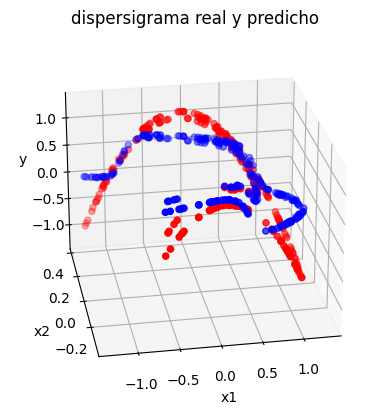

In [ ]:
# graficación

fig = plt.figure()

ax = fig.add_subplot(111, projection="3d")

ax.scatter3D(x1, x2, y, label='0', color="red")
ax.scatter3D(x1, x2, y_predichos, label='1', color="blue")

# Add labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('dispersigrama real y predicho')

# Rotación
ax.view_init(elev=25, azim=-100)

plt.show()




---



##**Implemente una red similar a la anterior usando Keras y compare los resultados.**

### Paso 1: Definición de la Arquitectura de la Red

```python
modelo = Sequential()
modelo.add(Dense(2, input_dim=2, activation='sigmoid'))  # Capa de entrada y primera capa oculta con 2 neuronas
modelo.add(Dense(1, activation='linear'))  # Capa de salida
```
- Se crea una red neuronal de tipo `Sequential`, lo que significa que las capas se apilan una tras otra de forma secuencial.
- La primera capa (`Dense`) tiene 2 neuronas y recibe entradas de 2 características (`input_dim=2`). La función de activación es `sigmoid`.
- La segunda capa (`Dense`) es la capa de salida y tiene 1 neurona. La función de activación es `linear` (lineal).

**Matemática detrás de las operaciones:**
- **Función de activación sigmoidal:** $$\sigma(z) = \frac{1}{1 + e^{-z}}$$Esta función mapea cualquier valor a un valor entre 0 y 1, útil para obtener propiedades de no linealidad entre las capas.
- **Función de activación lineal:** simplemente devuelve el valor que recibe. En la capa de salida, esto permite que la red prediga valores continuos sin restringir el rango, lo cual es ideal para problemas de regresión.

### Paso 2: Compilación del Modelo

```python
modelo.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
```
- Se compila el modelo, especificando el optimizador y la función de pérdida.
- Se usa `Adam` como optimizador, que es una extensión del descenso de gradiente estocástico que considera tasas de aprendizaje adaptativas para cada parámetro.
- Se define el `mean_squared_error` como la función de pérdida.

**Matemática detrás de las operaciones:**
- **Adam (Adaptive Moment Estimation):** combina las ventajas de dos extensiones del descenso de gradiente estocástico: AdaGrad, que funciona bien con problemas con gradientes dispersos, y RMSProp, que trabaja bien en entornos no estacionarios. Adam también mantiene un promedio decreciente de gradientes pasados y cuadrados de gradientes pasados, ajustando los pesos con:
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
  $$
  donde $\hat{m}_t$ y $\hat{v}_t$ son estimaciones corregidas de los primeros momentos (la media) y los segundos momentos (la varianza no centrada) de los gradientes.
- **Error Cuadrático Medio (MSE):**
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$
  donde $y_i$ son los valores reales y $\hat{y}_i$ son los valores predichos. Esta función de pérdida mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrática media entre los valores estimados y los reales.

### Paso 3: Entrenamiento del Modelo

```python
historial = modelo.fit(x_train_keras, target_train, epochs=2000, verbose=0)
```
- Se entrena el modelo con los datos de entrenamiento (`x_train_keras` y `target_train`).
- El entrenamiento se realiza durante 2000 épocas, lo que significa que el proceso de aprendizaje iterativo que ajusta los pesos usando el conjunto de datos completo se repite 2000 veces.

**Matemática detrás de las operaciones:**
- En cada época, el optimizador Adam ajusta los pesos $\theta$ de la red para minimizar el MSE. La actualización de los pesos se realiza mediante el cálculo de gradientes del error respecto a cada peso, seguido de la aplicación de las correcciones basadas en esos gradientes y las tasas de aprendizaje.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# ==== Se usan los mismos datos ==== #
x_train_keras = np.column_stack((x_train, y_train))
x_test_keras = np.column_stack((x_test, y_test))

# ==== Definir la arquitectura de la red ==== #
modelo = Sequential()
modelo.add(Dense(2, input_dim=2, activation='sigmoid'))   # Capa de entrada
modelo.add(Dense(2, activation='sigmoid'))                # Capa oculta con dos neuronas
modelo.add(Dense(1, activation='linear'))                 # Capa de salida

# ==== Compilar el modelo ==== #
modelo.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

# ==== Entrenar el modelo ==== #
historial = modelo.fit(x_train_keras, target_train, epochs=2000, verbose=0)



---



### Paso 4: Evaluación del Modelo

```python
loss = modelo.evaluate(x_test_keras, target_test, verbose=0)
print(f'Error cuadrático medio en el conjunto de prueba: {loss}')
```
- Se evalúa el modelo utilizando el conjunto de prueba (`x_test_keras` y `target_test`).
- Se calcula el error cuadrático medio (MSE) para medir el rendimiento del modelo en datos no vistos durante el entrenamiento.

**Matemática detrás de las operaciones:**
- **Error Cuadrático Medio (MSE)**:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$
  Como se mencionó antes, este es el promedio de los cuadrados de los errores. Es un indicador común del rendimiento de los modelos de regresión, mostrando cuánto se desvían, en promedio, las predicciones del modelo de los valores reales.

### Paso 5: Predicciones

```python
y_pred_keras = modelo.predict(x_test_keras).flatten()
```
- Se utilizan los datos de prueba para generar predicciones a partir del modelo entrenado. La función `.predict()` devuelve las predicciones que luego se aplana con `.flatten()`, lo que es útil para convertir los resultados en un formato compatible para comparaciones y visualizaciones posteriores.

**Matemática detrás de las operaciones:**
- El modelo utiliza los pesos y sesgos ajustados durante el entrenamiento para calcular la salida de la red dado un nuevo conjunto de entradas. Esto involucra calcular la suma ponderada de las entradas y pasarla a través de las funciones de activación configuradas para cada capa.

### Paso 6: Visualización de los Resultados

```python
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(target_test, y_pred_keras, color='blue')
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Keras: Valores Reales vs. Predichos')

plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'])
plt.title('Keras: Evolución del Error Cuadrático Medio')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')

plt.tight_layout()
plt.show()
```
- Se visualizan dos aspectos del modelo: la relación entre los valores reales y los predichos, y cómo cambió el error cuadrático medio durante el entrenamiento.
- El primer gráfico es un scatter plot que debería idealmente seguir una línea diagonal, indicando que las predicciones son exactas. La línea de puntos (`k--`) representa la perfecta correlación.
- El segundo gráfico muestra la evolución del error cuadrático medio a lo largo de las épocas de entrenamiento, proporcionando una visión de cómo el modelo mejoró (o no) con el tiempo.

**Matemática detrás de las operaciones:**
- **Correlación**: La línea diagonal en el gráfico de dispersión indica perfecta correlación. Cualquier desviación de esta línea muestra errores en la predicción.
- **Curva de Aprendizaje**: La gráfica de la evolución del error cuadrático medio ofrece una visión directa de la convergencia del modelo. Si el error disminuye de manera constante, indica que el modelo está aprendiendo efectivamente. Si el error se estabiliza o aumenta, puede ser un indicador de problemas como el sobreajuste o el subajuste.

Error cuadrático medio en el conjunto de prueba: 0.00038464932003989816
lo cual se compara con el Error cuadratico medio de la implementación manual: 0.18089363453967436
8/8 [==============================] - 0s 3ms/step


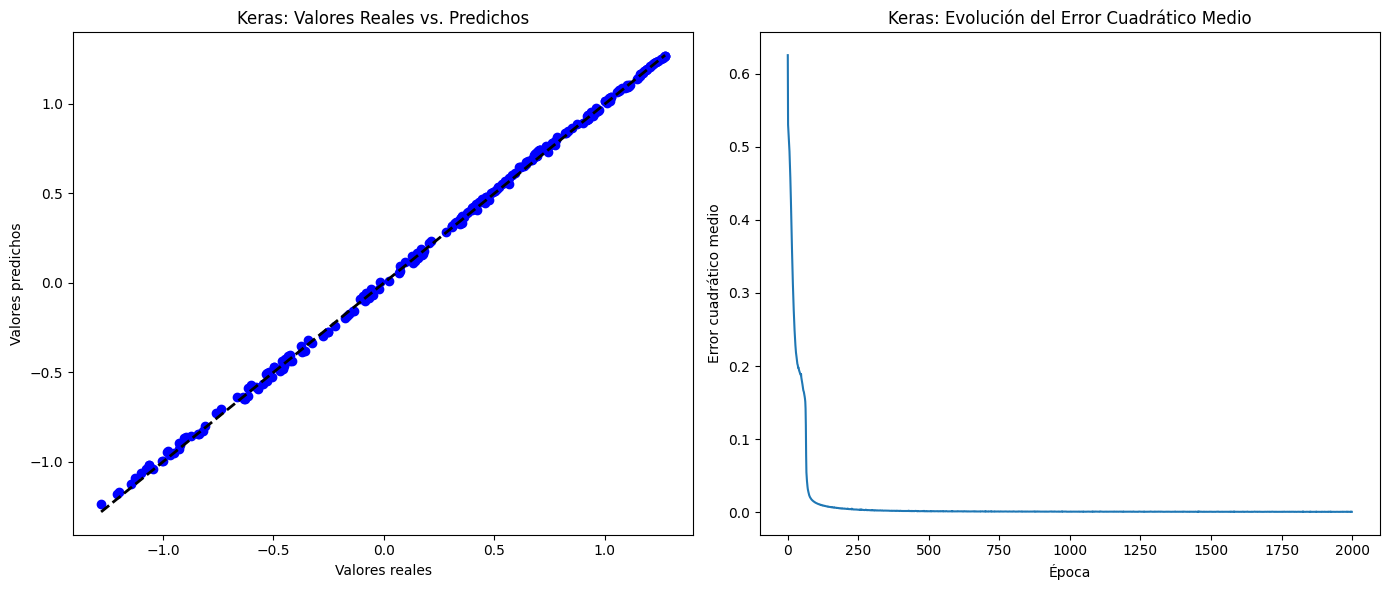

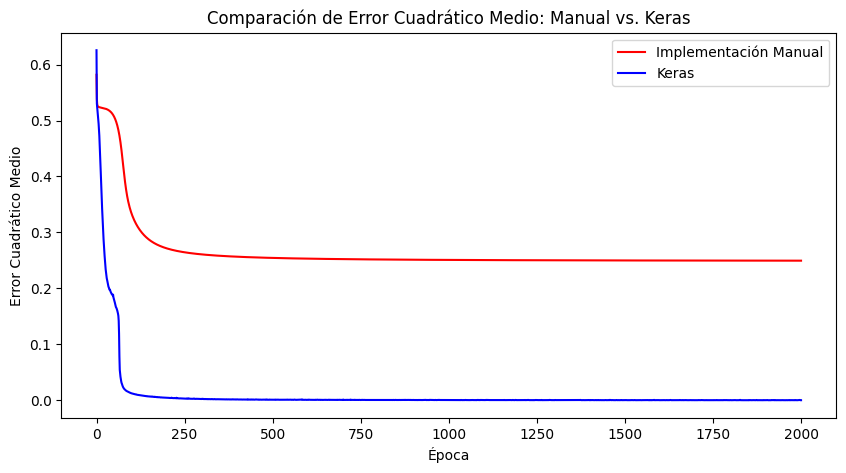

In [ ]:
# Evaluar el modelo
loss = modelo.evaluate(x_test_keras, target_test, verbose=0)
print(f'Error cuadrático medio en el conjunto de prueba: {loss}')
print(f"lo cual se compara con el Error cuadratico medio de la implementación manual: {error_cuadratico}")

# Predicciones
y_pred_keras = modelo.predict(x_test_keras).flatten()

# Visualizar los resultados comparativos
plt.figure(figsize=(14, 6))

# Subplot 1: Comparación de valores reales y predichos
plt.subplot(1, 2, 1)
plt.scatter(target_test, y_pred_keras, color='blue')
plt.plot([min(target_test), max(target_test)], [min(target_test), max(target_test)], 'k--', lw=2)  # Línea de predicción
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Keras: Valores Reales vs. Predichos')

# Subplot 2: Errores a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'])
plt.title('Keras: Evolución del Error Cuadrático Medio')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')

plt.tight_layout()
plt.show()

# Comparación gráfica entre la implementación manual y Keras
plt.figure(figsize=(10, 5))
plt.plot(errores, label='Implementación Manual', color='red')
plt.plot(historial.history['loss'], label='Keras', color='blue')
plt.title('Comparación de Error Cuadrático Medio: Manual vs. Keras')
plt.xlabel('Época')
plt.ylabel('Error Cuadrático Medio')
plt.legend()
plt.show()
